## <font style="color:yellow">Trabalho Prático 3</font>

#### Introdução a Processamento Digital de Imagens

Dupla: Anne Karolinne Dias e Dayany Lima  

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

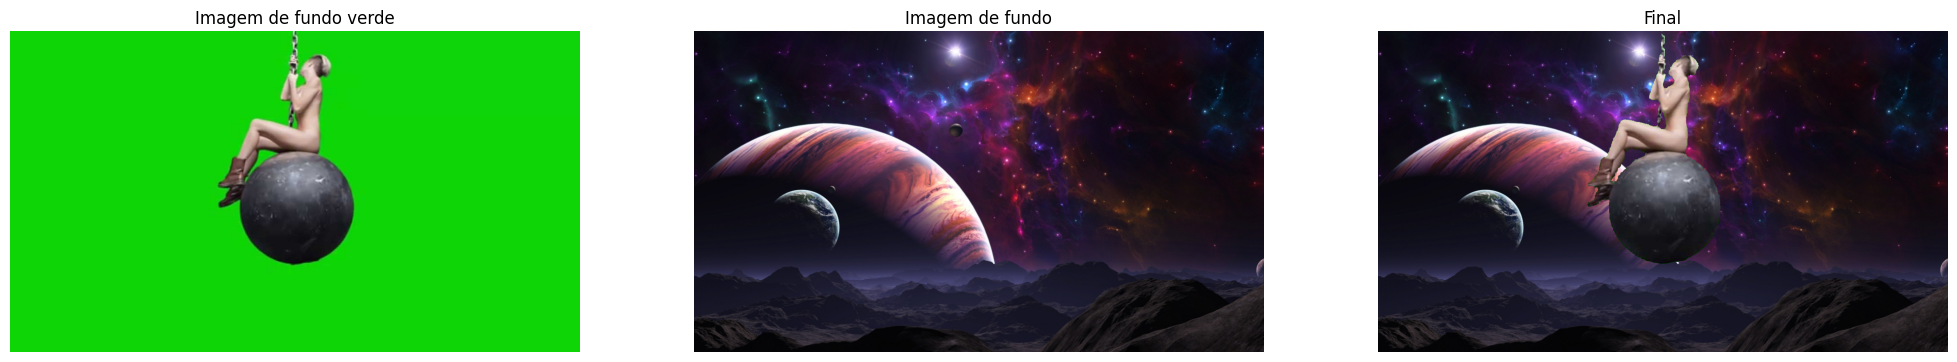

True

In [3]:
# Calcula o valor de Hue (matiz) mais frequente na imagem
def getHistogramHuePeakValue(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h = hsv_img[:,:,0]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    return np.argmax(hist_h)

# Carrega as imagens que serão usadas
image = cv2.imread("miley.jpg",1)
shape = (image.shape[1], image.shape[0])
background = cv2.resize(cv2.imread("galaxy1.jpg",1), shape, interpolation=cv2.INTER_AREA)

# Obtém o valor de Hue mais frequente
PEAK_VALUE = getHistogramHuePeakValue(image)

# Converte para HSV e separa os canais
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)

# Definindo os limites para a máscara
UPPER = PEAK_VALUE + 16
LOWER = PEAK_VALUE - 16

# Criando a máscara
mask = ((h >= LOWER) & (h <= UPPER) & (s >= 255 * 0.3) & (v >= 255 * 0.2)) * 255
mask = mask.astype('uint8')
mask_inv = cv2.bitwise_not(mask)

# Aplicando a máscara e combinando as imagens
img_background = cv2.bitwise_and(background, background, mask=mask)
img_foreground = cv2.bitwise_and(image, image, mask=mask_inv)
result = cv2.add(img_background, img_foreground)

# Ajusta o tamanho da figura
fig = plt.figure(figsize=(25, 10))

# Exibindo as imagens
fig.add_subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Imagem de fundo verde")

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Imagem de fundo")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Final")

# Mostrar as imagens
plt.show()

# Salvar apenas a imagem final
cv2.imwrite("imagem_final.png", result)

### Foram usados vídeos de entrada de mesma duração (3 segundos) e ajustado para vídeo de saída tenha duração de 10 segundos.

In [4]:
# Calcula o valor de Hue (matiz) mais frequente na imagem
def getHistogramHuePeakValue(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h = hsv_img[:,:,0]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    return np.argmax(hist_h)

# Arquivos de entrada e saída
input_video = "input_video.mp4"             # vídeo fundo verde
background_video = "video_fundo.mp4"       # vídeo de fundo
output_video = "output_video.mp4"          # vídeo de saída 

# Abre o vídeo de entrada
cap = cv2.VideoCapture(input_video)

# Abre o vídeo de fundo
bg_cap = cv2.VideoCapture(background_video)

# Obtém as informações dos vídeos
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Duração em segundos
duration = 10
total_frames = int(fps * duration)

# Cria o objeto VideoWriter para salvar o vídeo de saída
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Contador de frames processados
frames_processed = 0

# Processa cada frame do vídeo
while frames_processed < total_frames:
    ret_frame, frame = cap.read()
    ret_bg, background = bg_cap.read()
    
    if not ret_frame:
        # Reinicia o vídeo de entrada se ele acabar
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        ret_frame, frame = cap.read()
        if not ret_frame:
            break

    if not ret_bg:
        # Reinicia o vídeo de fundo se ele acabar
        bg_cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        ret_bg, background = bg_cap.read()
        if not ret_bg:
            break

    # Redimensiona o fundo para o tamanho do frame
    background = cv2.resize(background, (width, height), interpolation=cv2.INTER_AREA)

    # Obtém o valor de Hue mais frequente do frame
    PEAK_VALUE = getHistogramHuePeakValue(frame)

    # Converte para HSV e separa os canais
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_frame)

    # Definindo os limites para a máscara
    UPPER = PEAK_VALUE + 16
    LOWER = PEAK_VALUE - 16

    # Criando a máscara
    mask = ((h >= LOWER) & (h <= UPPER) & (s >= 255 * 0.3) & (v >= 255 * 0.2)) * 255
    mask = mask.astype('uint8')
    mask_inv = cv2.bitwise_not(mask)

    # Aplicando a máscara e combinando as imagens
    img_background = cv2.bitwise_and(background, background, mask=mask)
    img_foreground = cv2.bitwise_and(frame, frame, mask=mask_inv)
    result = cv2.add(img_background, img_foreground)

    # Escreve o frame processado no vídeo de saída
    out.write(result)

    # Atualiza o contador de frames
    frames_processed += 1

# Libera os objetos de vídeo
cap.release()
bg_cap.release()
out.release()
cv2.destroyAllWindows()
